In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images[0].shape

(784,)

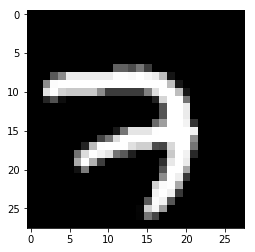

In [5]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

In [2]:
sess = tf.InteractiveSession()

Tensor("Conv2D_2:0", shape=(1, 14, 14, 5), dtype=float32)



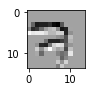

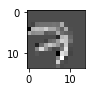

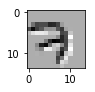

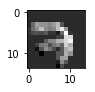

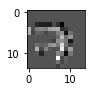

In [10]:
img = img.reshape(-1, 28, 28, 1)
# (-1, 28, 28, 1) -1: 모든 샘플 수, 28 by 28 size, 1 color

W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# 3 by 3 size convolution layer, 1 color, 5 number of filters

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
# strides=[1, 2, 2, 1] -> (2, 2): 가로 세로 두 칸씩 움직이겠다.

print(conv2d)

print()
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    plt.show()

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


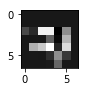

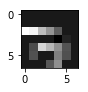

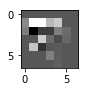

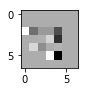

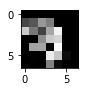

In [11]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
# pooling layer size: 2 by 2
# strides=[1, 2, 2, 1] -> (2, 2): 가로 세로 두 칸씩 움직이겠다.

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')  
    plt.show()